In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

# %config InlineBackend.figure_format = 'svg'
%matplotlib inline 

# Download and load MTA turnstile data

In [ ]:
def all_saturdays(start_date, end_date):
    modified_end_date = datetime.datetime.strptime(end_date,'%m/%d/%Y')+ datetime.timedelta(weeks = 1)
    saturday_list = pd.date_range(start =start_date, end =modified_end_date,
                              freq='W-SAT').strftime('%m/%d/%Y').tolist()
    return saturday_list

In [ ]:
def import_mta(date):
    formatted_date = date[-2:]+date[:2]+date[3:5]
    base_url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    date_url = base_url.format(formatted_date)
    date_data = pd.read_csv(date_url)
    return date_data

In [ ]:
def mta_to_df(saturday_list):
    dict_of_dfs = {}
    for saturday in saturday_list:
        dict_of_dfs[saturday] = pd.DataFrame(import_mta(saturday))
    mta =pd.DataFrame()
    for val in dict_of_dfs.values():
        mta = pd.concat([mta, val])
    return mta

In [ ]:
# start_date = input("Enter start date (X/X/XXXX): ")
# end_date = input("Enter end date (X/X/XXXX): ")
start_date = '3/1/2019'
end_date = '6/1/2019'

In [ ]:
saturday_list = all_saturdays(start_date,end_date)

In [ ]:
# print(saturday_list)

In [ ]:
mta = mta_to_df(saturday_list)

In [ ]:
mta.tail()

# In case of later breakage

In [ ]:
mta.to_csv(r'mta.csv')

In [7]:
# mta = pd.read_csv('mta.csv')

# Cleaning

## column names

In [8]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062159 entries, 0 to 3062158
Data columns (total 12 columns):
Unnamed: 0                                                              int64
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS               

In [9]:
mta.columns

Index(['Unnamed: 0', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
mta.columns = mta.columns.str.strip().str.lower().str.replace('/',"_")

In [11]:
mta.columns

Index(['unnamed: 0', 'c_a', 'unit', 'scp', 'station', 'linename', 'division',
       'date', 'time', 'desc', 'entries', 'exits'],
      dtype='object')

## create datetime column from date and time

In [12]:
mta["datetime"] = pd.to_datetime(mta.date + " " + mta.time, format="%m/%d/%Y %H:%M:%S")

In [13]:
mta.head()

,unnamed: 0,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112,2019-02-23 03:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125,2019-02-23 07:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199,2019-02-23 11:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248,2019-02-23 15:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292,2019-02-23 19:00:00


## filter to previously specified dates

In [14]:
mta.date.value_counts().sort_index()

02/23/2019    28827
02/24/2019    29109
02/25/2019    28842
02/26/2019    29777
02/27/2019    28903
              ...  
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
Name: date, Length: 105, dtype: int64

In [15]:
mta.date = pd.to_datetime(mta.date,format="%m/%d/%Y")

In [16]:
mta = mta[(mta.date >= start_date)]

NameError: name 'start_date' is not defined

In [ ]:
mta = mta[(mta.date <= end_date)]

In [17]:
mta.date.value_counts().sort_index()

2019-02-23    28827
2019-02-24    29109
2019-02-25    28842
2019-02-26    29777
2019-02-27    28903
              ...  
2019-06-03    30022
2019-06-04    29513
2019-06-05    29484
2019-06-06    29213
2019-06-07    28745
Name: date, Length: 105, dtype: int64

In [18]:
mta.drop(columns = ['time'], inplace = True)

In [19]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062159 entries, 0 to 3062158
Data columns (total 12 columns):
unnamed: 0    int64
c_a           object
unit          object
scp           object
station       object
linename      object
division      object
date          datetime64[ns]
desc          object
entries       int64
exits         int64
datetime      datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 280.3+ MB


In [20]:
mta.head(10)

,unnamed: 0,c_a,unit,scp,station,linename,division,date,desc,entries,exits,datetime
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,REGULAR,6955483,2359112,2019-02-23 03:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,REGULAR,6955494,2359125,2019-02-23 07:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,REGULAR,6955554,2359199,2019-02-23 11:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,REGULAR,6955714,2359248,2019-02-23 15:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,REGULAR,6956004,2359292,2019-02-23 19:00:00
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,REGULAR,6956147,2359325,2019-02-23 23:00:00
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,REGULAR,6956177,2359332,2019-02-24 03:00:00
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,REGULAR,6956184,2359339,2019-02-24 07:00:00
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,REGULAR,6956215,2359388,2019-02-24 11:00:00
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,REGULAR,6956315,2359432,2019-02-24 15:00:00


## duplicates

In [21]:
(mta
 .groupby(["c_a", "unit", "scp", "station", "datetime"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(50)

,c_a,unit,scp,station,datetime,entries
442825,G009,R151,02-00-03,CONEY IS-STILLW,2019-05-16 17:00:00,2
1496797,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 05:00:00,2
1496794,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-24 17:00:00,2
807316,N071,R013,00-00-03,34 ST-PENN STA,2019-02-28 07:00:00,2
806038,N071,R013,00-00-01,34 ST-PENN STA,2019-02-28 07:00:00,2
807314,N071,R013,00-00-03,34 ST-PENN STA,2019-02-28 03:00:00,2
807312,N071,R013,00-00-03,34 ST-PENN STA,2019-02-27 19:00:00,2
1496795,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-24 21:00:00,2
1496796,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 01:00:00,2
2502831,R283,R221,00-00-02,167 ST,2019-04-16 04:00:00,2


In [22]:
# mask = ((mta["c_a"] == "G009") & 
#     (mta["unit"] == "R151") & 
#     (mta["scp"] == "02-00-04") & 
#     (mta["station"] == "CONEY IS-STILLW") &
#     (mta["datetime"] == "2019-05-16 17:00:00"))
# mta[mask].head(10)

In [23]:
mta.sort_values(["c_a", "unit", "scp", "station", "datetime"], inplace=True, ascending=False)
mta.drop_duplicates(subset=["c_a", "unit", "scp", "station", "datetime"], inplace=True)

In [24]:
(mta
 .groupby(["c_a", "unit", "scp", "station", "datetime"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(10)

,c_a,unit,scp,station,datetime,entries
0,A002,R051,02-00-00,59 ST,2019-02-23 03:00:00,1
2041373,R141,R031,00-03-04,34 ST-PENN STA,2019-04-19 00:00:00,1
2041364,R141,R031,00-03-04,34 ST-PENN STA,2019-04-17 12:00:00,1
2041365,R141,R031,00-03-04,34 ST-PENN STA,2019-04-17 16:00:00,1
2041366,R141,R031,00-03-04,34 ST-PENN STA,2019-04-17 20:00:00,1
2041367,R141,R031,00-03-04,34 ST-PENN STA,2019-04-18 00:00:00,1
2041368,R141,R031,00-03-04,34 ST-PENN STA,2019-04-18 04:00:00,1
2041369,R141,R031,00-03-04,34 ST-PENN STA,2019-04-18 08:00:00,1
2041370,R141,R031,00-03-04,34 ST-PENN STA,2019-04-18 12:00:00,1
2041371,R141,R031,00-03-04,34 ST-PENN STA,2019-04-18 16:00:00,1


In [25]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3062056 entries, 3062158 to 0
Data columns (total 12 columns):
unnamed: 0    int64
c_a           object
unit          object
scp           object
station       object
linename      object
division      object
date          datetime64[ns]
desc          object
entries       int64
exits         int64
datetime      datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 303.7+ MB


In [26]:
mta.to_csv(r'mta_cleaned.csv')

In [5]:
# mta = pd.read_csv('mta.csv')

## daily entries by turnstile

In [ ]:
mta.head(10)

In [ ]:
by_turnstile_date = mta.groupby(['c_a', 'unit', 'scp', 'station', mta.datetime.dt.date])

In [ ]:
mta_daily = by_turnstile_date['entries'].min().reset_index()

In [ ]:
mta_daily['daily_entries'] = mta_daily.groupby(['c_a', 'unit', 'scp', 'station'])['entries'].diff().shift(-1)

In [ ]:
mta_daily.describe([.95,.997])

In [ ]:
mta_daily = mta_daily.reset_index()
check_distribution = mta_daily[mta_daily.daily_entries.notnull()]

plt.figure(figsize=(10,4))
sns.distplot(check_distribution.daily_entries)

In [ ]:
#dropping rows with negative daily entries
mta_daily = mta_daily[mta_daily.daily_entries >= 0]

In [ ]:
#dropping rows with the top .3% of daily entries
mta_daily = mta_daily[mta_daily.daily_entries < mta_daily.daily_entries.quantile(q =.997)]

In [ ]:
mta_daily.describe()

In [ ]:
check_distribution = mta_daily[mta_daily.daily_entries.notnull()]

plt.figure(figsize=(10,4))
sns.distplot(check_distribution.daily_entries)

In [7]:
mta_daily.to_csv(r'mta_daily.csv')

NameError: name 'mta_daily' is not defined

In [8]:
# mta_daily = pd.read_csv('mta_daily.csv')

### challenge 4

In [ ]:
turnstile = mta_daily[
    (mta_daily["c_a"] == "G009") & 
    (mta_daily["unit"] == "R151") & 
    (mta_daily["scp"] == "02-00-04") & 
    (mta_daily["station"] == "CONEY IS-STILLW")
    ].groupby(["datetime"]).daily_entries.max()

plt.figure(figsize=(10,4))
plt.plot(turnstile);

### challenge 5

In [ ]:
by_ca_unit_station_date = (mta_daily.groupby(['c_a', 'unit', 'station', 'datetime'])
                           .daily_entries.agg({'daily_entries': 'sum'}))
by_ca_unit_station_date.head()

### challenge 6

In [10]:
by_station = (mta_daily.groupby(['station', 'datetime'])
                           .daily_entries.agg({'daily_entries': 'sum'}))
by_station.tail()

/opt/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


daily_entries
station   datetime                 
ZEREGA AV 2019-05-27         1111.0
          2019-05-28         2746.0
          2019-05-29         2815.0
          2019-05-30         2841.0
          2019-05-31         2740.0

### challenge 7

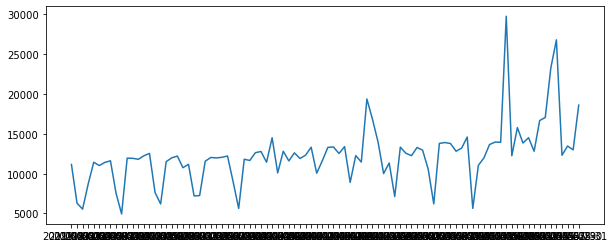

In [12]:
by_station = by_station.reset_index()

station = by_station[ 
    (by_station["station"] == "CONEY IS-STILLW")
    ].groupby(["datetime"])['daily_entries'].agg(['max'])

plt.figure(figsize=(10,4))
plt.plot(station);

In [ ]:
# unique_stations = by_station.station.unique()

In [ ]:
# plt.figure(figsize=(10,4))

# for i in unique_stations:
#     station= by_station[by_station['station'] == i
#     ].groupby(["datetime"])['daily_entries'].agg(['max'])
#     plt.plot(station[:-1]);

### challenge 8

## entries by turnstile and time

In [27]:
# by_turnstile_time = mta.groupby(['c_a', 'unit', 'scp', 'station', mta.datetime.dt.hour])

In [ ]:
# mta_hourly = by_turnstile_time['entries'].min().reset_index()
# mta_hourly

In [29]:
# mta_hourly['hourly_entries'] = mta_hourly.groupby(['c_a', 'unit', 'scp', 'station'])['entries'].diff().shift(-1)

In [33]:
by_turnstile_time = mta.groupby(['c_a', 'unit', 'scp', 'station', 'datetime'])
mta_hourly = by_turnstile_time['entries'].min().reset_index()

In [ ]:
mta_hourly['hourly_entries'] = mta_hourly.groupby(['station', mta_hourly.datetime])['entries'].diff().shift(-1)

In [ ]:
mta_hourly.describe([.95,.97])

In [ ]:
mta_hourly = mta_hourly.reset_index()
test = mta_hourly[mta_hourly.hourly_entries.notnull()]

plt.clf()
plt.figure(figsize=(10,4))
sns.distplot(test.hourly_entries)

In [ ]:
#dropping rows with negative hourly entries
mta_hourly = mta_hourly[mta_hourly.hourly_entries >= 0]

In [ ]:
#dropping rows with the top .3% of daily entries
mta_hourly = mta_hourly[mta_hourly.hourly_entries < mta_hourly.hourly_entries.quantile(q =.997)]

In [ ]:
check_distribution = mta_hourly[mta_hourly.hourly_entries.notnull()]

plt.figure(figsize=(10,4))
sns.distplot(check_distribution.hourly_entries)

In [ ]:
mta_hourly.to_csv(r'mta_hourly.csv')

In [3]:
# mta_hourly = pd.read_csv('mta_hourly.csv')

In [4]:
mta_hourly.head()

,Unnamed: 0,index,c_a,unit,scp,station,datetime,entries,hourly_entries
0,1,1,A002,R051,02-00-00,59 ST,3,6962094,10599.0
1,3,3,A002,R051,02-00-00,59 ST,7,6962111,10593.0
2,4,4,A002,R051,02-00-00,59 ST,8,6972704,24911.0
3,5,5,A002,R051,02-00-00,59 ST,9,6997615,45372.0
4,7,7,A002,R051,02-00-00,59 ST,11,6962243,10514.0


In [ ]:
#sum entries for each hour and sort them